# Load dataset & preprocessing

In [1]:
import pandas as pd
import numpy as np

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
exp_dir = "datasets/infuluenza/vecLSTMx2/"

df = pd.read_csv(data_path)

In [2]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

,Alltime,Time,region,regnames,Longitude,Latitude,Altitude,Year,Month,Week,Flucases,Holiday,Tempave,Tempmin,Tempmax,Rh,Rainfall
12480,12481,1,13,Tokyo,35.689185,139.691648,34.9,2000,1,1,818,2,9.528571,6.371429,13.385714,50.571429,1.0
12481,12482,2,13,Tokyo,35.689185,139.691648,34.9,2000,1,2,1167,3,8.642857,5.457143,12.000000,61.142857,41.5
12482,12483,3,13,Tokyo,35.689185,139.691648,34.9,2000,1,3,2562,2,6.828571,4.171429,9.500000,56.000000,24.0
12483,12484,4,13,Tokyo,35.689185,139.691648,34.9,2000,1,4,3781,2,5.342857,1.542857,9.400000,42.000000,0.0
12484,12485,5,13,Tokyo,35.689185,139.691648,34.9,2000,1,5,3903,2,7.214286,3.171429,11.585714,38.714286,0.0


In [3]:
import matplotlib.pyplot as plt #描画用ライブラリ

In [4]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [5]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

In [6]:
columns = ["Flucases","Tempave", "Rh", "Holiday", "Rainfall"]

all_data = df_tokyo[columns]

In [7]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [8]:
train_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
12480,818,9.528571,50.571429,2,1.0
12481,1167,8.642857,61.142857,3,41.5
12482,2562,6.828571,56.000000,2,24.0
12483,3781,5.342857,42.000000,2,0.0
12484,3903,7.214286,38.714286,2,0.0


In [9]:
test_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
13260,3809,5.357143,47.142857,3,6.5
13261,9892,6.285714,38.285714,2,35.5
13262,8198,5.628571,53.857143,3,19.0
13263,9625,6.771429,63.714286,2,31.5
13264,7844,4.228571,49.000000,2,9.0


In [10]:
print(train_df.describe())

           Flucases     Tempave          Rh     Holiday    Rainfall
count    780.000000  780.000000  780.000000  780.000000  780.000000
mean    1084.017949   16.711740   59.834982    2.250000   31.223077
std     2649.278290    7.715720   11.440497    0.541298   40.612104
min        0.000000    3.328571   28.714286    2.000000    0.000000
25%        3.000000    9.489286   51.535714    2.000000    3.500000
50%       33.000000   16.985714   61.071429    2.000000   18.000000
75%      652.000000   23.232143   69.000000    2.000000   43.500000
max    18939.000000   31.057143   83.857143    5.000000  331.000000


In [11]:
print(test_df.describe())

           Flucases     Tempave          Rh     Holiday    Rainfall
count    260.000000  260.000000  260.000000  260.000000  260.000000
mean    2309.269231   16.461648   68.987912    2.276923   31.961538
std     4573.142025    7.646755   12.133344    0.633863   43.487033
min        2.000000    1.771429   38.285714    2.000000    0.000000
25%       44.250000    9.253571   60.250000    2.000000    3.375000
50%      232.500000   17.192857   70.357143    2.000000   18.000000
75%     2131.750000   22.707143   78.000000    2.000000   44.250000
max    26635.000000   30.228571   94.714286    7.000000  337.500000


trainとtestのdfを作る

In [12]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave", "Rh", "Rainfall"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave", "Rh", "Rainfall"]]
test_xs_df = test_df["Holiday"]

# Dataset and DataLoader

In [13]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [14]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
data_dir = "datasets/infuluenza/vecLSTMx2/"
exp_dir = "datasets/infuluenza/vecLSTMx2/"

if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

In [15]:
seq_length = 1

train_Xs = np.load(data_dir + "train_Xs_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_ys_" + str(seq_length) + "w.npy")
val_Xs = np.load(data_dir + "val_Xs_" + str(seq_length) + "w.npy")
val_ys = np.load(data_dir + "val_ys_" + str(seq_length) + "w.npy")

In [16]:
trn_xs_tensor = torch.Tensor(train_Xs)
trn_ys_tensor = torch.Tensor(train_ys)

val_xs_tensor = torch.Tensor(val_Xs)
val_ys_tensor = torch.Tensor(val_ys)

In [17]:
train_Xs.shape, train_ys.shape, val_Xs.shape, val_ys.shape

((623, 1, 5), (623, 1, 5), (156, 1, 5), (156, 1, 5))

In [18]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(exp_dir + 'std_scaler.joblib')

In [19]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [20]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
1 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
2 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
3 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
4 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
5 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
6 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
7 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
8 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
9 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
10 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
11 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
12 torch.Size([23, 1, 5]) torch.Size([23, 1, 5])


In [21]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
1 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
2 torch.Size([50, 1, 5]) torch.Size([50, 1, 5])
3 torch.Size([6, 1, 5]) torch.Size([6, 1, 5])


# LSTM model

In [22]:
class cLSTM(nn.Module):
    def __init__(self, input_size = 4, hidden_size=32, cond_size = 1, output_size=4, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.cond_size = cond_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.cfc1 = nn.Linear(self.cond_size, int(self.hidden_size / 2))
        self.cfc2 = nn.Linear(int(self.hidden_size / 2), int(self.hidden_size / 4))
        
        self.fc1 = nn.Linear(int(self.hidden_size / 4) + self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x, cin):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
        
        ch1 = self.relu(self.cfc1(cin))
        ch2 = self.cfc2(ch1)
        
        h_list = [outs, ch2]
        h1 = torch.cat(h_list, dim=1)
        h2 = self.relu(self.fc1(h1))
        h3 = self.fc2(h2)
        
        y_list = [self.relu(h3[:,0:1]), h3[:,1:3], self.relu(h3[:,3:4])]
        ys = torch.cat(y_list, dim=1)

        return ys

In [23]:
model = cLSTM(input_size = 5, hidden_size = 32, cond_size = 1, output_size = 4, num_layers = 1)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Prediction

In [27]:
batch_0x = list(trn_loader)[0][0]
batch_0c = list(trn_loader)[0][1]

In [28]:
batch_0x.shape, batch_0c.shape

(torch.Size([50, 1, 5]), torch.Size([50, 1, 5]))

In [29]:
batch_0c = torch.reshape(batch_0c[:,:,-1], (batch_0c.shape[0], 1))

In [30]:
batch_0c.shape

torch.Size([50, 1])

In [31]:
preds = model(batch_0x, batch_0c)

In [32]:
preds.shape

torch.Size([50, 4])

## Train

In [33]:
model.cuda()

cLSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(5, 32, dropout=0.2)
  (cfc1): Linear(in_features=1, out_features=16, bias=True)
  (cfc2): Linear(in_features=16, out_features=8, bias=True)
  (fc1): Linear(in_features=40, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [34]:
criterion = nn.MSELoss(reduction='none').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [35]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()
                input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))

            preds = model(inputs, input_c)
            true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
            loss = criterion(preds, true_ys).mean(dim=0).mean()
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [36]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        optimizer.zero_grad()
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        loss = criterion(preds, true_ys).mean(dim=0).mean()
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.9823575982680688 Val loss:  0.6981236413121223
epoch:  1 Train loss:  0.9304818786107577 Val loss:  0.641628623008728
epoch:  2 Train loss:  0.8268585067528945 Val loss:  0.5321870893239975
epoch:  3 Train loss:  0.6514847805866828 Val loss:  0.410943940281868
epoch:  4 Train loss:  0.5368395837453696 Val loss:  0.37797120213508606
epoch:  5 Train loss:  0.5327361042682941 Val loss:  0.3622329644858837
epoch:  6 Train loss:  0.5115685073228983 Val loss:  0.35424911975860596
epoch:  7 Train loss:  0.46426396186535174 Val loss:  0.3422495983541012
epoch:  8 Train loss:  0.46504573409373945 Val loss:  0.33533382043242455
epoch:  9 Train loss:  0.4090463381547194 Val loss:  0.26226387545466423
epoch:  10 Train loss:  0.3312661968744718 Val loss:  0.23949237540364265
epoch:  11 Train loss:  0.31603190761346084 Val loss:  0.2348148413002491
epoch:  12 Train loss:  0.30746034475473255 Val loss:  0.2367262039333582
epoch:  13 Train loss:  0.308732624237354 Val loss:  0

epoch:  113 Train loss:  0.2779638858941885 Val loss:  0.2120700590312481
epoch:  114 Train loss:  0.279538828593034 Val loss:  0.21104951947927475
epoch:  115 Train loss:  0.27314771482577693 Val loss:  0.21388618554919958
epoch:  116 Train loss:  0.28431134957533616 Val loss:  0.20700587145984173
epoch:  117 Train loss:  0.2799154371023178 Val loss:  0.2094566635787487
epoch:  118 Train loss:  0.28790006385399747 Val loss:  0.20871219597756863
epoch:  119 Train loss:  0.27608185891921705 Val loss:  0.21567145735025406
epoch:  120 Train loss:  0.28036940785554737 Val loss:  0.21349007729440928
epoch:  121 Train loss:  0.2758406469455132 Val loss:  0.20870971865952015
epoch:  122 Train loss:  0.2723642885684967 Val loss:  0.21180449053645134
epoch:  123 Train loss:  0.27279268778287447 Val loss:  0.2134725246578455
epoch:  124 Train loss:  0.27425743066347563 Val loss:  0.20925328321754932
epoch:  125 Train loss:  0.27464639911284816 Val loss:  0.20693322457373142
epoch:  126 Train los

epoch:  225 Train loss:  0.2583122413892012 Val loss:  0.21287302393466234
epoch:  226 Train loss:  0.25937509880616116 Val loss:  0.21593318320810795
epoch:  227 Train loss:  0.25921637966082645 Val loss:  0.21526817604899406
epoch:  228 Train loss:  0.26251367307626283 Val loss:  0.21075832471251488
epoch:  229 Train loss:  0.2675355111177151 Val loss:  0.21152876690030098
epoch:  230 Train loss:  0.2587691889359401 Val loss:  0.21300803683698177
epoch:  231 Train loss:  0.2573212144466547 Val loss:  0.21690062247216702
epoch:  232 Train loss:  0.2580418712817706 Val loss:  0.2155179101973772
epoch:  233 Train loss:  0.26062860741065097 Val loss:  0.21062875539064407
epoch:  234 Train loss:  0.2604504789297397 Val loss:  0.2197408191859722
epoch:  235 Train loss:  0.25166703359438825 Val loss:  0.21428353153169155
epoch:  236 Train loss:  0.2634739646544823 Val loss:  0.21173817478120327
epoch:  237 Train loss:  0.25639085242381465 Val loss:  0.22346296161413193
epoch:  238 Train los

epoch:  339 Train loss:  0.24074732454923484 Val loss:  0.2213904857635498
epoch:  340 Train loss:  0.24524728094155973 Val loss:  0.2196630723774433
epoch:  341 Train loss:  0.24274367896410134 Val loss:  0.22199272736907005
epoch:  342 Train loss:  0.2376517137655845 Val loss:  0.22571933642029762
epoch:  343 Train loss:  0.24116445963199323 Val loss:  0.22487517073750496
epoch:  344 Train loss:  0.23829547946269697 Val loss:  0.2177008967846632
epoch:  345 Train loss:  0.24581304994913247 Val loss:  0.22302000038325787
epoch:  346 Train loss:  0.2394878394328631 Val loss:  0.21896684914827347
epoch:  347 Train loss:  0.2415989121565452 Val loss:  0.22633429989218712
epoch:  348 Train loss:  0.24194941956263322 Val loss:  0.2202751338481903
epoch:  349 Train loss:  0.23892433941364288 Val loss:  0.22037163004279137
epoch:  350 Train loss:  0.24409265701587385 Val loss:  0.2208577785640955
epoch:  351 Train loss:  0.23892230139328882 Val loss:  0.22196918353438377
epoch:  352 Train lo

epoch:  452 Train loss:  0.2250851828318376 Val loss:  0.22972328960895538
epoch:  453 Train loss:  0.2235591090642489 Val loss:  0.22625253535807133
epoch:  454 Train loss:  0.22636023851541373 Val loss:  0.22994259744882584
epoch:  455 Train loss:  0.2302415405328457 Val loss:  0.2276390641927719
epoch:  456 Train loss:  0.222954660654068 Val loss:  0.23036444000899792
epoch:  457 Train loss:  0.22808657242701605 Val loss:  0.22634084150195122
epoch:  458 Train loss:  0.22336886708553022 Val loss:  0.23005998507142067
epoch:  459 Train loss:  0.22278744326188013 Val loss:  0.2277884092181921
epoch:  460 Train loss:  0.22179899765894964 Val loss:  0.2288250233978033
epoch:  461 Train loss:  0.22424897780785194 Val loss:  0.22639626637101173
epoch:  462 Train loss:  0.22236953904995552 Val loss:  0.2332123015075922
epoch:  463 Train loss:  0.22516560210631445 Val loss:  0.23291692323982716
epoch:  464 Train loss:  0.22721081742873558 Val loss:  0.23210076615214348
epoch:  465 Train los

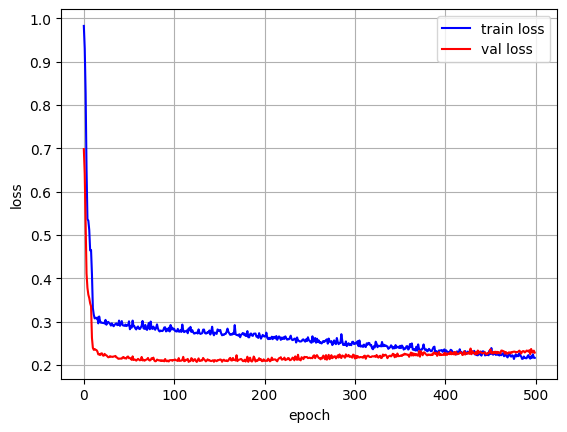

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [38]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(125, 0.20693322457373142)

In [24]:
save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"

model = torch.load(save_model_path)

### Scatter plot

In [25]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
np.array(trues_list).shape, np.array(preds_list).shape

((623, 1, 4), (623, 1, 4))

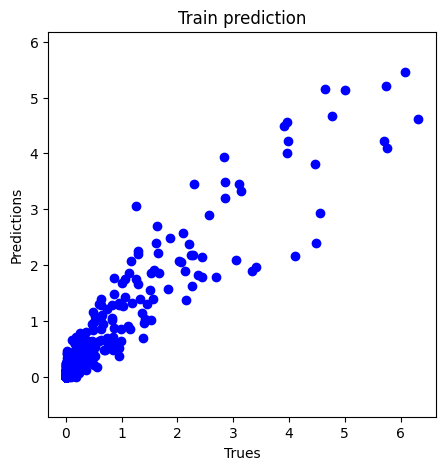

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする
plt.show()

In [28]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155


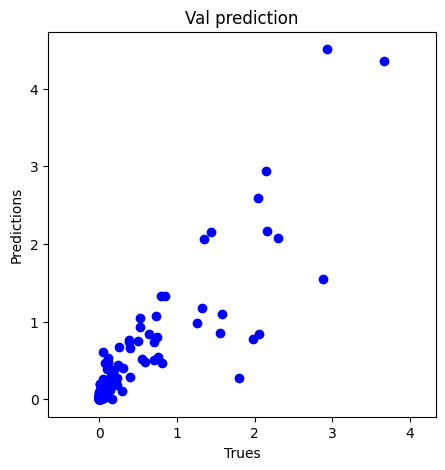

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする

plt.show()

## Test prediction

In [30]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(exp_dir + "train_np.npy")
test_np = np.load(exp_dir + "test_np.npy")

In [31]:
train_np.shape, test_np.shape

((780, 5), (260, 5))

In [32]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(data_dir + 'std_scaler.joblib')

In [33]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

In [34]:
test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [35]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 500

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 10

test_scaled_zs = (np.array(test_np[:,3]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [36]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
test_scaled_ys.shape, test_scaled_zs.reshape(-1,1).shape, test_scaled_ts.reshape(-1,1).shape, test_np.shape

((260, 2), (260, 1), (260, 1), (260, 5))

In [38]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_scaled_zs.reshape(-1,1), test_np[:,-1].reshape(-1,1)], axis = 1)

In [39]:
test_all_np.shape

(260, 5)

### 1. Prediction based on results from 40 days ago

In [40]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [41]:
test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [42]:
tst_xs_tensor = torch.Tensor(test_Xs)
tst_ys_tensor = torch.Tensor(test_ys)

In [43]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [44]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


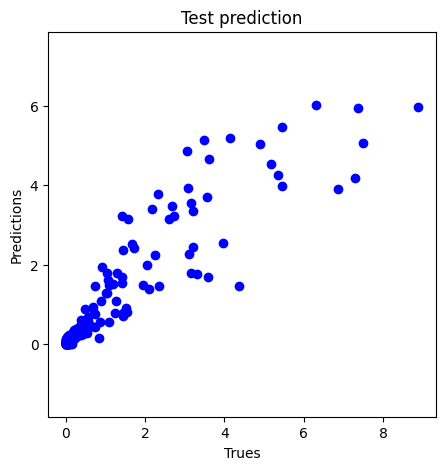

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画
plt.gca().set_aspect('equal', adjustable='datalim')

plt.show()

In [46]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [47]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

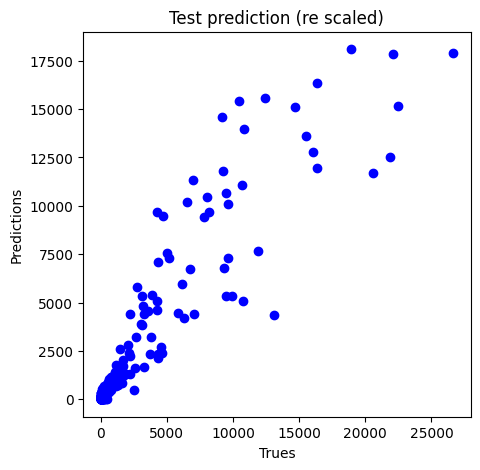

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [49]:
tst_preds.shape

(259, 1)

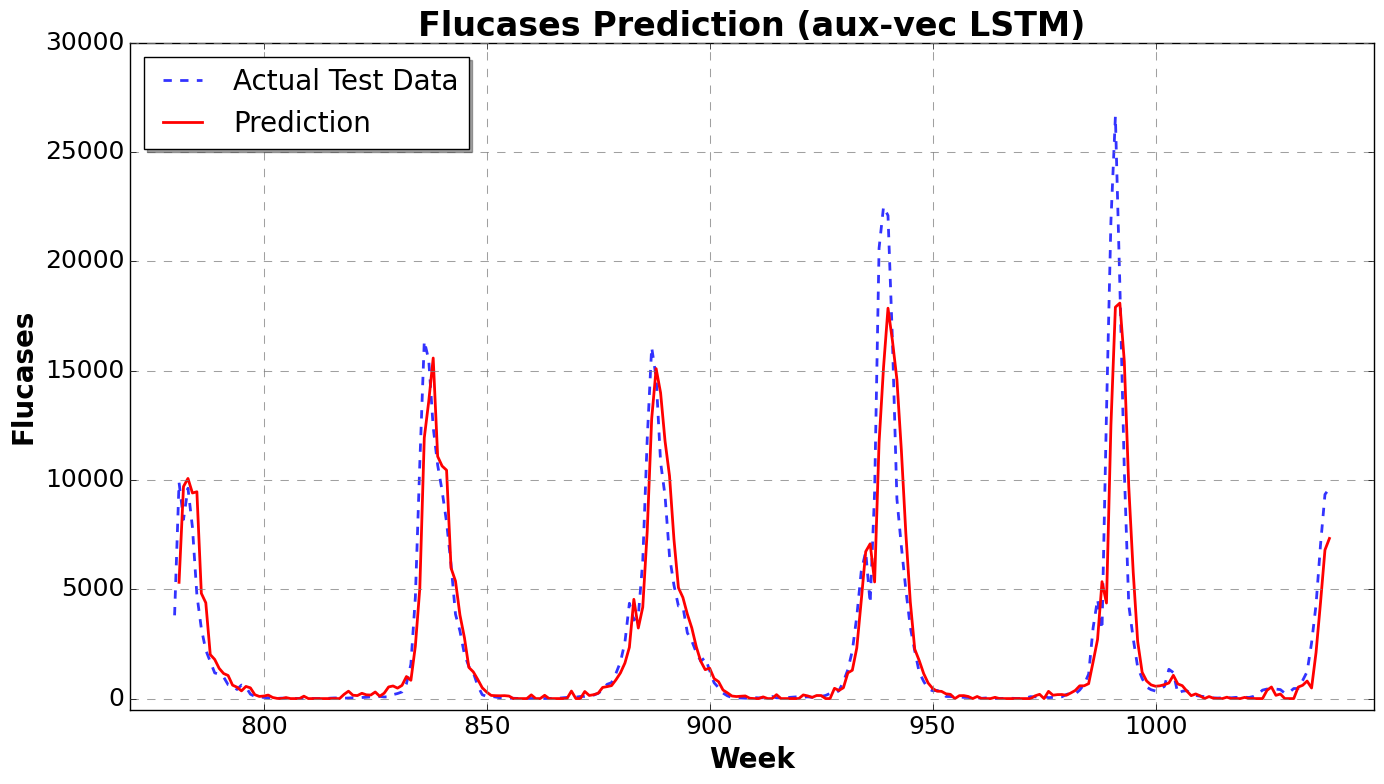

In [50]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Flucases Prediction (aux-vec LSTM)", fontsize=24, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
#plt.savefig("Flucases Prediction (aux-vec LSTM).jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [51]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [52]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 3087827.9161635693.
RMSE : 1757.2216468515203.
MAE : 768.2852250213328.
R2 : 0.8522917405442894.
pearson : 0.9243215642973233 1.6145110335474238e-109


In [53]:
reg_metric(test_np[seq_length*52:,0], tst_preds[seq_length*51:,0], "Flucases")

Flucases
MSE : 3570094.2230853257.
RMSE : 1889.4692966770658.
MAE : 848.0250771595881.
R2 : 0.8519449255868747.
pearson : 0.9252900103167715 1.0938539128680829e-88
